## **Predicting Plant Health Using Machine Learning Models**


- In this notebook, I aim to develop a predictive model to monitor and analyze plant health based on various environmental parameters. This initiative is a part of the smart planter project which is designed to assist both home gardeners and farmers in optimizing their yield and minimizing waste. The predictive model will utilize machine learning algorithms to analyze data from various sensors and predict the health of the plant.

### **Dataset Description**

- The dataset contains the following attributes:

   - **Humidity (%):** The percentage of water vapor present in the air surrounding the plants.
   - **Nitrogen Levels (mg/kg):** The concentration of nitrogen in the soil, measured in milligrams per kilogram.
   - **Ambient Temperature (°C):** The surrounding temperature measured in degrees Celsius.
   - **Presence of Sunlight:** A binary attribute indicating whether the plant is exposed to sunlight.
   - **Plant Health:** The target variable indicating the health status of the plant.

In [20]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

### **Data Simulation Function: generate_data**

- This function simulates the generation of a dataset with 10000 data points, which are equally distributed across three categories: 'Healthy', 'Moderate', and 'Unhealthy'. These categories represent different states of plant health. The attributes for each data point include 'Humidity (%)', 'Nitrogen Levels (mg/kg)', 'Ambient Temperature (°C)', 'Presence of Sunlight', and 'Plant Health'. The values of these attributes are generated based on certain conditions defined for each category to simulate real-world scenarios.

- **Parameters**
   - n: The total number of data points to be generated. It is set to 10000 by default.
- **Returns**
   - df: A shuffled pandas DataFrame containing the generated data points with their respective attributes.

In [3]:
# Number of data points
n = 10000

# Simulate data collection
def generate_data(n):
    data = {
        'Humidity (%)': [],
        'Nitrogen Levels (mg/kg)': [],
        'Ambient Temperature (°C)': [],
        'Presence of Sunlight': [],
        'Plant Health': []
    }
    
    # Generate a third of the data for each category
    for category in ['Healthy', 'Moderate', 'Unhealthy']:
        for _ in range(n // 3):
            if category == 'Healthy':
                data['Humidity (%)'].append(random.uniform(50, 70))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(100, 150))
                data['Ambient Temperature (°C)'].append(random.uniform(15, 25))
                data['Presence of Sunlight'].append(1)
                data['Plant Health'].append('Healthy')
            elif category == 'Moderate':
                data['Humidity (%)'].append(random.uniform(40, 80))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(80, 170))
                data['Ambient Temperature (°C)'].append(random.uniform(10, 30))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Moderate')
            else:
                data['Humidity (%)'].append(random.uniform(0, 100))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(0, 200))
                data['Ambient Temperature (°C)'].append(random.uniform(-10, 40))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Unhealthy')
    
    # Create a DataFrame and shuffle it
    df = pd.DataFrame(data)
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

df = generate_data(n)

In [4]:
df.head(10)

,Humidity (%),Nitrogen Levels (mg/kg),Ambient Temperature (°C),Presence of Sunlight,Plant Health
0,68.031413,133.828659,19.398839,1,Healthy
1,56.730508,111.590247,33.227743,1,Unhealthy
2,61.742981,136.741891,17.204645,1,Healthy
3,16.556540,163.975525,0.706655,0,Unhealthy
4,77.764123,197.997788,22.787443,0,Unhealthy
5,78.863612,137.627394,27.704854,0,Moderate
6,57.245981,103.282572,21.622807,1,Healthy
7,75.481046,114.149872,29.841136,0,Moderate
8,34.131883,64.904187,5.032788,1,Unhealthy
9,57.982781,137.600939,15.917014,1,Healthy


In [13]:
# Save to CSV
#df.to_csv('plant_health_dataset.csv', index=False)

### **Loading the Dataset**

In [17]:
# Read CSV
df = pd.read_csv('plant_health_dataset.csv')

### **Data Preprocessing**
- Perform necessary data preprocessing steps here
- For instance, handling missing values, encoding categorical variables, etc.

In [4]:
# Handle the missing data if exists
df = df.dropna()

In [19]:
# Encode the categorical data
le = LabelEncoder()
df['Plant Health'] = le.fit_transform(df['Plant Health'])

### **Exploratory Data Analysis**
- Perform exploratory data analysis here
- For instance, using seaborn or matplotlib to visualize the data

In [24]:
# Find the correlation between the features 
df.corr()

,Humidity (%),Nitrogen Levels (mg/kg),Ambient Temperature (°C),Presence of Sunlight,Plant Health
Humidity (%),1.000000,0.075512,0.064991,0.040988,-0.221958
Nitrogen Levels (mg/kg),0.075512,1.000000,0.062494,0.081018,-0.270148
Ambient Temperature (°C),0.064991,0.062494,1.000000,0.066711,-0.219552
Presence of Sunlight,0.040988,0.081018,0.066711,1.000000,-0.427915
Plant Health,-0.221958,-0.270148,-0.219552,-0.427915,1.000000


<Axes: >

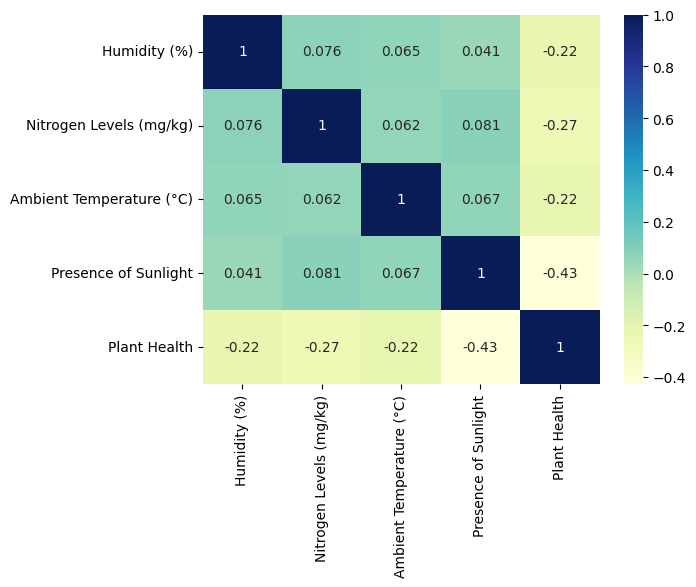

In [25]:
# Visualize the correlation
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

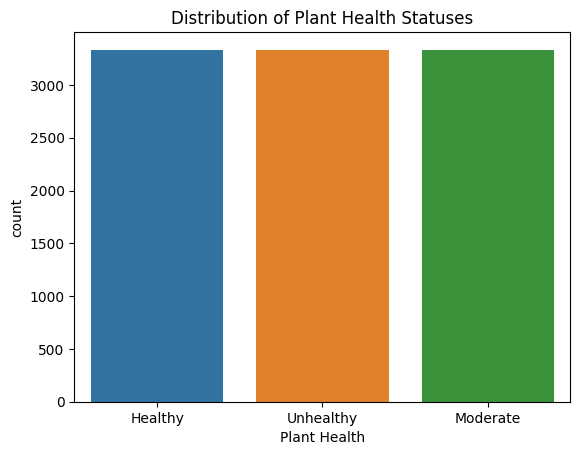

In [21]:
# Create a temporary series with replaced values
temp_series = df['Plant Health'].replace({0: 'Healthy', 1: 'Moderate', 2: 'Unhealthy'})

# Plot the distribution of plant health statuses
sns.countplot(x=temp_series)
plt.title('Distribution of Plant Health Statuses')
plt.show()

### **Building Neural Networks**

In [4]:
# Split the data into training and testing sets
X = df.drop('Plant Health', axis=1)
y = df['Plant Health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Import required libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
# Build a neural network using a library like TensorFlow
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.8189 - accuracy: 0.6248 - val_loss: 0.5595 - val_accuracy: 0.7731
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7565 - val_loss: 0.4221 - val_accuracy: 0.8581
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8053 - val_loss: 0.3607 - val_accuracy: 0.8800
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8329 - val_loss: 0.3260 - val_accuracy: 0.8994
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8420 - val_loss: 0.3089 - val_accuracy: 0.9087
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8519 - val_loss: 0.2999 - val_accuracy: 0.9106
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8562 - val_loss: 0.2922 - val_accuracy: 0.9106

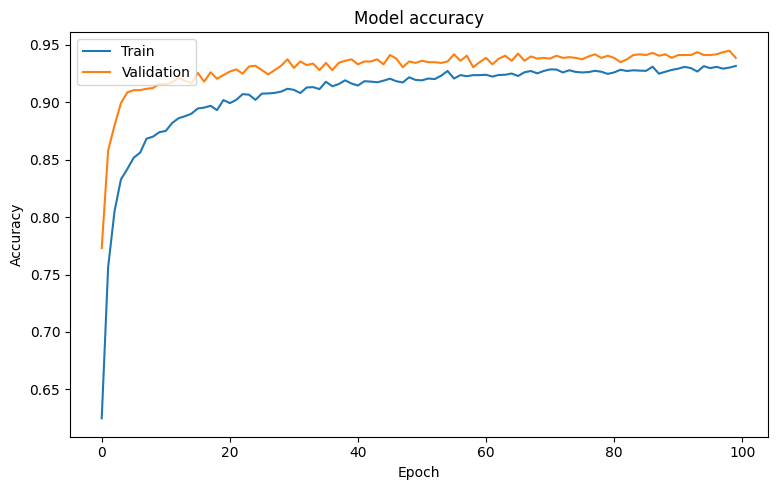

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


63/63 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9325
Test Accuracy: 0.9325000047683716


In [19]:
# Making predictions on new data
new_data = [[61.007023, 106.570495, 21.414754, 1]]  # Example data
new_data = scaler.transform(new_data)  # Normalize the data
predictions = model.predict(new_data)
predicted_label = le.inverse_transform([np.argmax(predictions)])  # Convert back to original label
print(f'Predicted Label: {predicted_label[0]}')


1/1 [==============================] - 0s 85ms/step
Predicted Label: Healthy


C:\Users\jawad2019.namal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
